# Aggregating and Plotting Average Rating

In [8]:
#load data
import pandas
from datetime import datetime
from pytz import utc 
import matplotlib.pyplot as plt

data= pandas.read_csv('../reviews.csv', parse_dates=['Timestamp'])

# take a look inside data structure
data.head()

,Course Name,Timestamp,Rating,Comment
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN


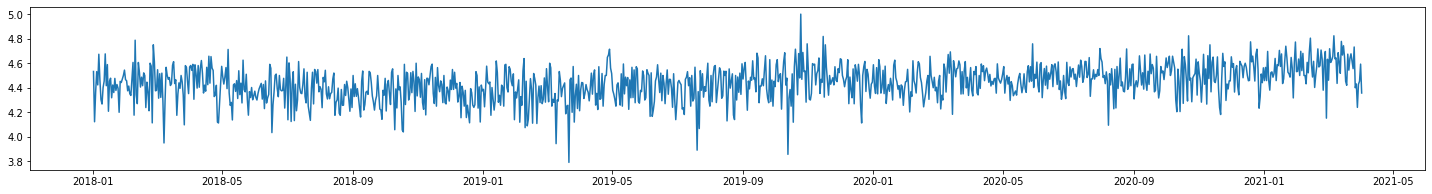

In [10]:
# Aggregate data 
data['Day']=data['Timestamp'].dt.date  # add new column with extracted date from data

day_average= data.groupby(['Day']).mean()
day_average.head()

# use matplot to plot char
plt.figure(figsize=(25,3))
plt.plot(day_average.index, day_average['Rating'])

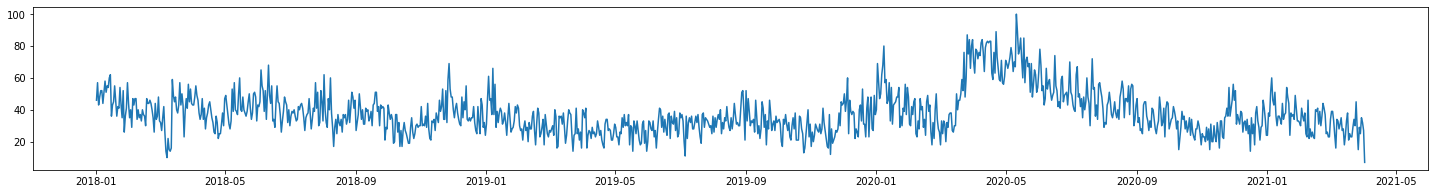

In [19]:
data['Day']=data['Timestamp'].dt.date
day_count= data.groupby('Day').count()
day_count.head()

plt.figure(figsize=(25,3))
plt.plot(day_count.index, day_count['Rating'])

# Rating Average by Week, Downsampling and Plotting 

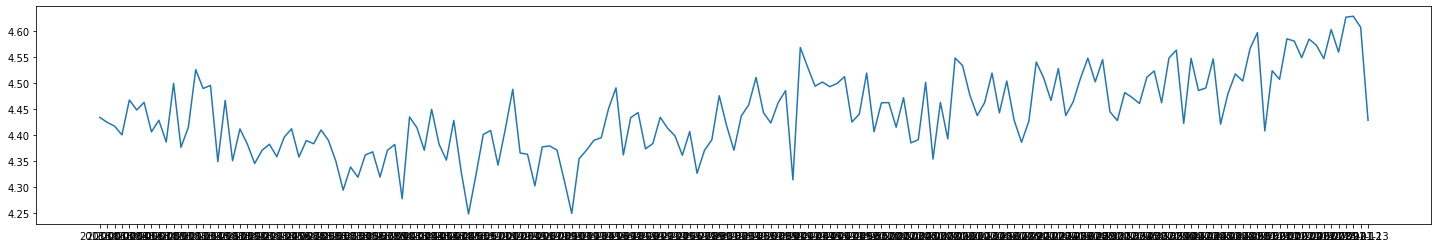

In [25]:
# Create new data, Week in data frame

data['Week'] = data['Timestamp'].dt.strftime('%Y-%U')
# group data
week_average=data.groupby(['Week']).mean()


# do the plotting
plt.figure(figsize=(25,4))
plt.plot(week_average.index, week_average['Rating'])


## Average Rating by month

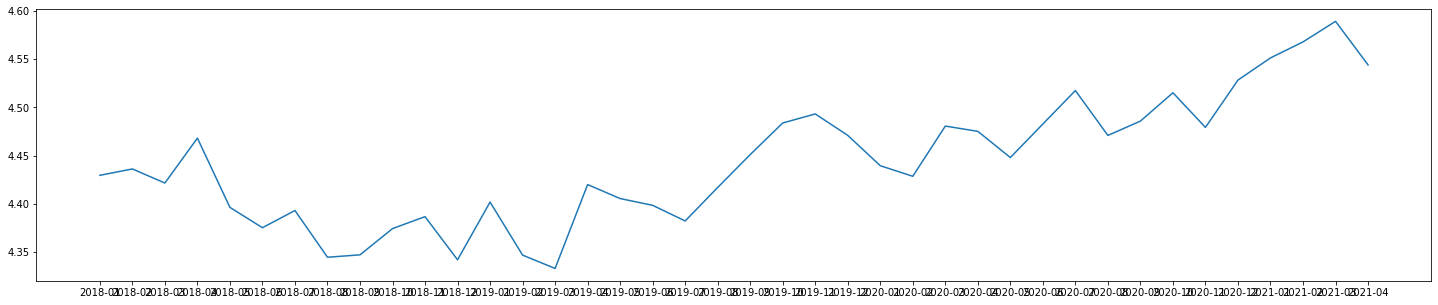

In [26]:
data['Month']= data['Timestamp'].dt.strftime('%Y-%m')
month_average= data.groupby(['Month']).mean()

plt.figure(figsize=(25,5))
plt.plot(month_average.index, month_average['Rating'])

## Average by Year

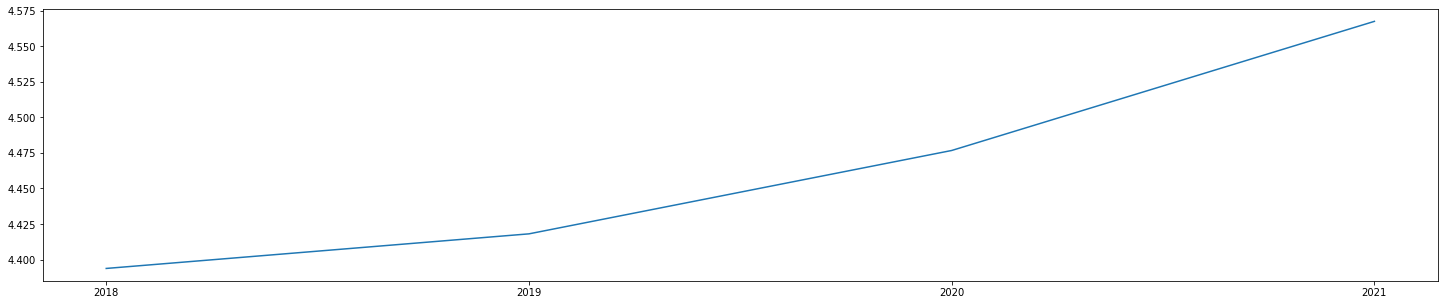

In [27]:
data['Year']=data['Timestamp'].dt.strftime('%Y')
yearly_avg= data.groupby(['Year']).mean()

plt.figure(figsize=(25,5))
plt.plot(yearly_avg.index, yearly_avg['Rating'])

# Average rating by month by course

<AxesSubplot:xlabel='Month'>

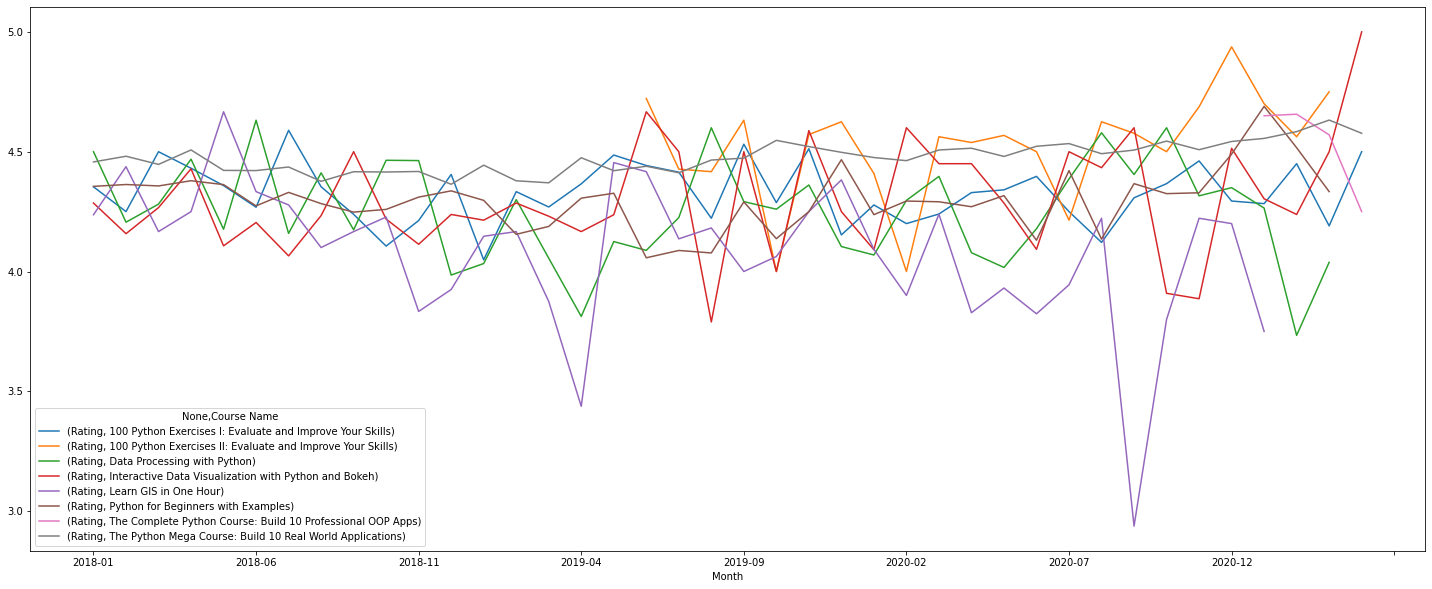

In [38]:
data['Month']=data['Timestamp'].dt.strftime('%Y-%m')

# create new data frame
month_average_course=data.groupby(['Month','Course Name']).mean().unstack()

month_average_course.plot(figsize=(25,10))


<AxesSubplot:xlabel='Month'>

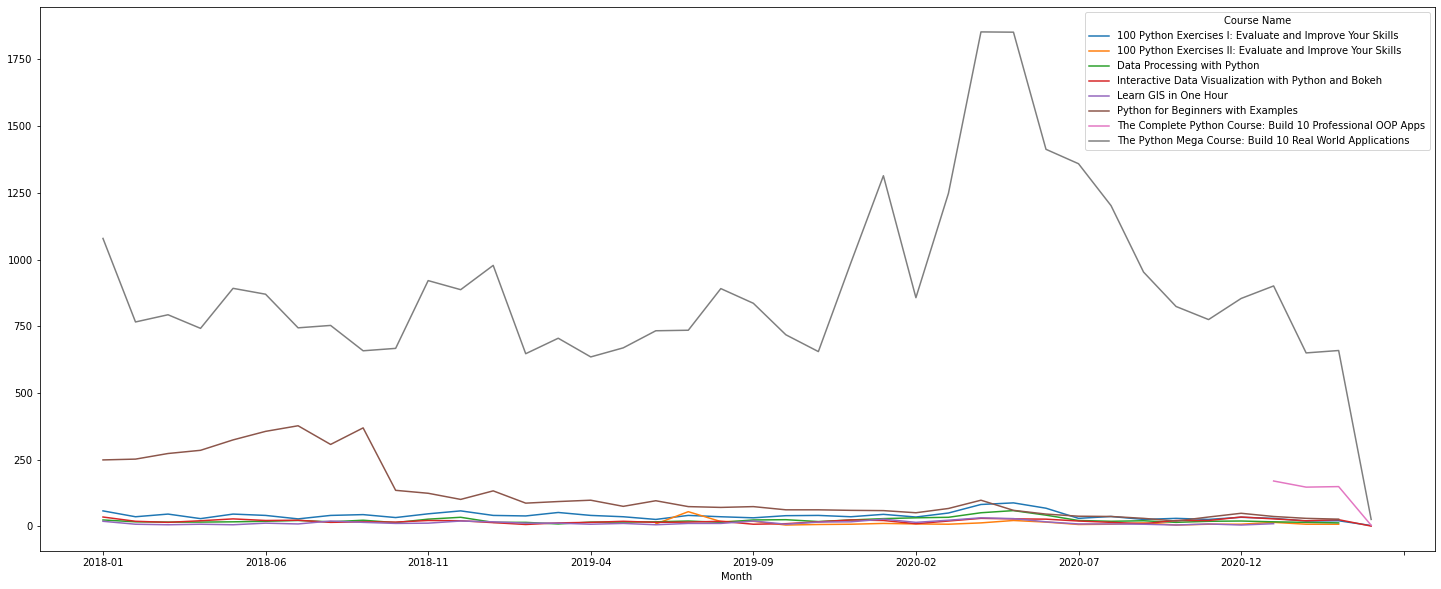

In [39]:
data['Month']=data['Timestamp'].dt.strftime('%Y-%m')

# create new data frame
month_average_course=data.groupby(['Month','Course Name'])['Rating'].count().unstack()

month_average_course.plot(figsize=(25,10))

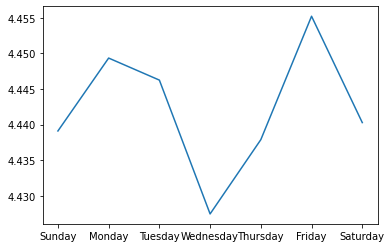

In [46]:
# if average rating for all course is highest on certain day, thats happy day

data['WeekDay']=data['Timestamp'].dt.strftime('%A')

#day number
data['Daynumber']=data['Timestamp'].dt.strftime('%w')

weekDay_average= data.groupby(['WeekDay', 'Daynumber']).mean()

#sort week Day
weekDay_average=weekDay_average.sort_values('Daynumber')

plt.plot(weekDay_average.index.get_level_values(0), weekDay_average['Rating'])